In [1]:
import sys
sys.path.append(r'..//')
from ioMicro import *
import scanpy as sc
save_folder= r'\\192.168.0.100\bbfish100\DCBBL1_4week_6_2_2023\MERFISH_Analysis'

In [2]:
save_folder= r'\\192.168.0.100\bbfish100\DCBBL1_4week_6_2_2023\MERFISH_Analysis'
save_folder_ =save_folder+r'\final_spots'
saved_fls = glob.glob(save_folder_+os.sep+'*_cell_df_newCellSeg.pkl')
scdatas = []
for iset in range(len(saved_fls)):
    #scdata2=sc.read_h5ad(r'D:\scdatas\DCBBL1_1year1wkNJ_ASO_SAL_4_18_2023__iset1.h5ad')
    df,cell_df = get_df__cell_df(save_folder,iset=iset)
    #genes_prev = list(scdata2.var.index)
    scdata = get_scdata(df,cell_df,genes_prev=None,th_vol = 2500,pixel_size=0.10833*4)
    scdatas.append(scdata)

C:\Scripts\NMERFISH\PTB_project\..\ioMicro.py:3344: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  scdata2 = sc.AnnData(dfR_)
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\scanpy\preprocessing\_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))
C:\Scripts\NMERFISH\PTB_project\..\ioMicro.py:3344: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnD

['DCBBL1_4week_6_2_2023_set1',
 'DCBBL1_4week_6_2_2023_set2',
 'DCBBL1_4week_6_2_2023_set3']

In [8]:
names = [os.path.basename(name).split('_cell_df')[0]for name in saved_fls]
for name,scdata in zip(names,scdatas):
    scdata.obs["tag"]=name
adata = sc.concat(scdatas, join="outer")

C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


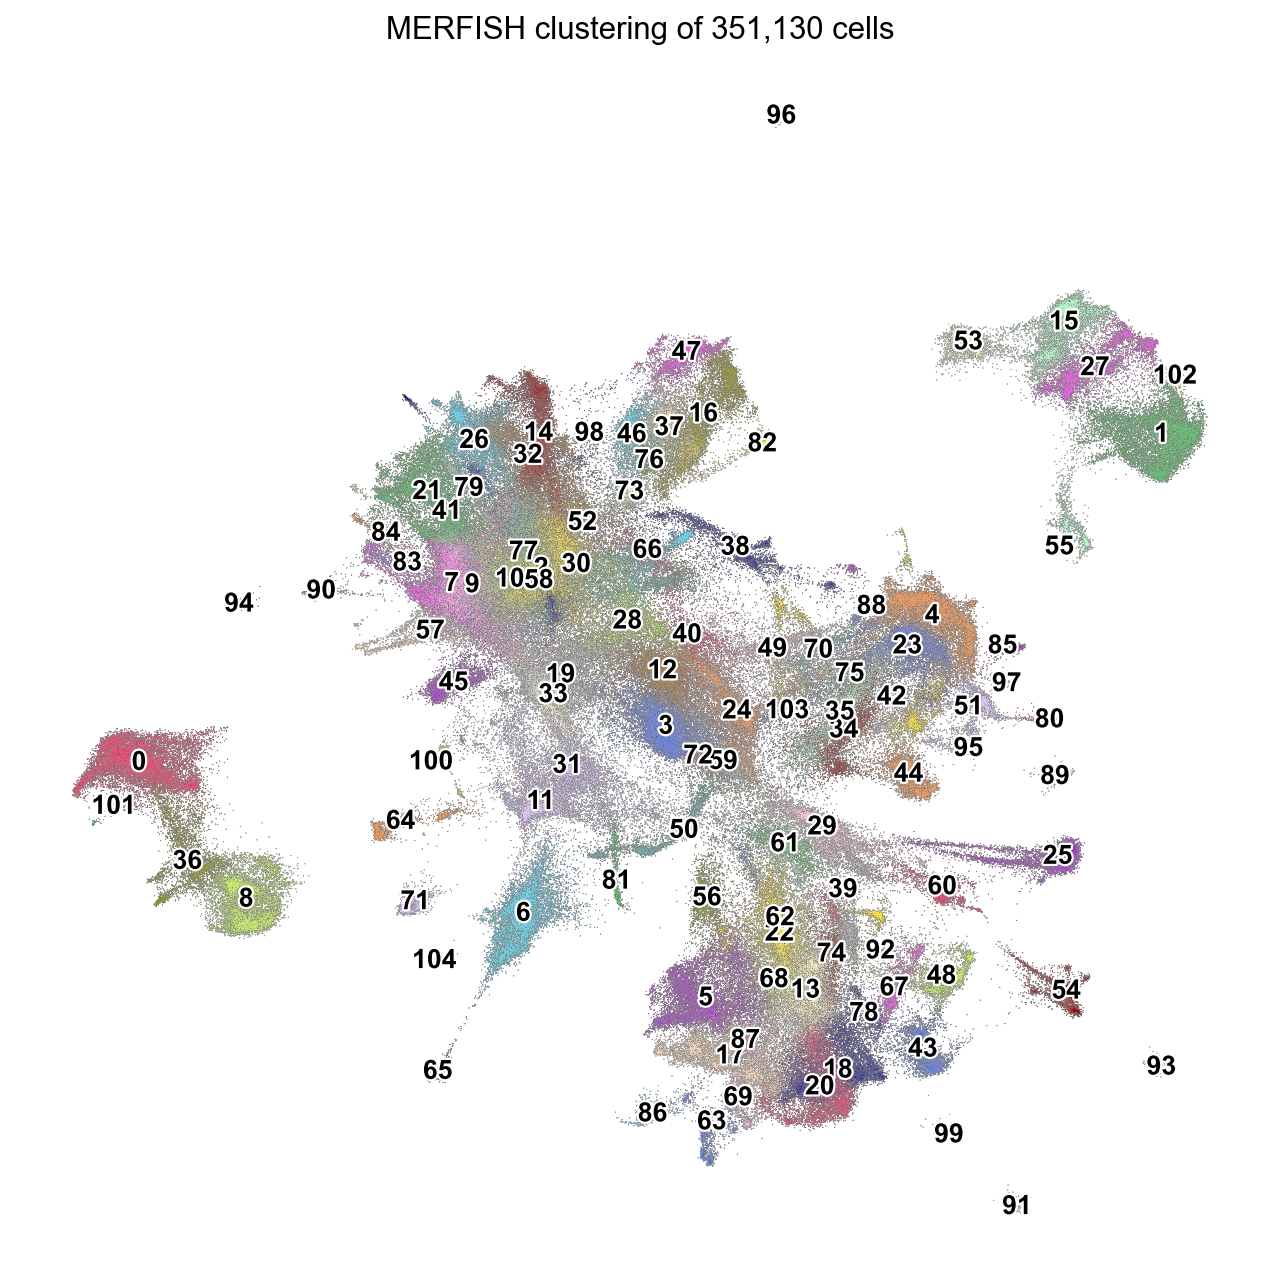

In [31]:
sc.pp.neighbors(adata, use_rep = "X")  #metric='correlation'
sc.tl.leiden(adata, resolution=4) #### 
#plt.figure()
sc.tl.umap(adata,random_state=9,min_dist=0.3)
cmap = ["#e6194B", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#42d4f4", "#f032e6", "#bfef45",
        "#fabed4", "#469990", "#dcbeff", "#9A6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1",
        "#000075", "#a9a9a9"]

sc.set_figure_params(figsize=(10,10))
sc.pl.umap(
    adata,
    color="leiden",
    add_outline=True,
    legend_loc="on data",
    legend_fontsize=12,
    legend_fontoutline=2,
    frameon=False,
    title=f"MERFISH clustering of {len(adata):,d} cells",
    palette=cmap
)

In [36]:
sc.tl.leiden(adata, resolution=5)

C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


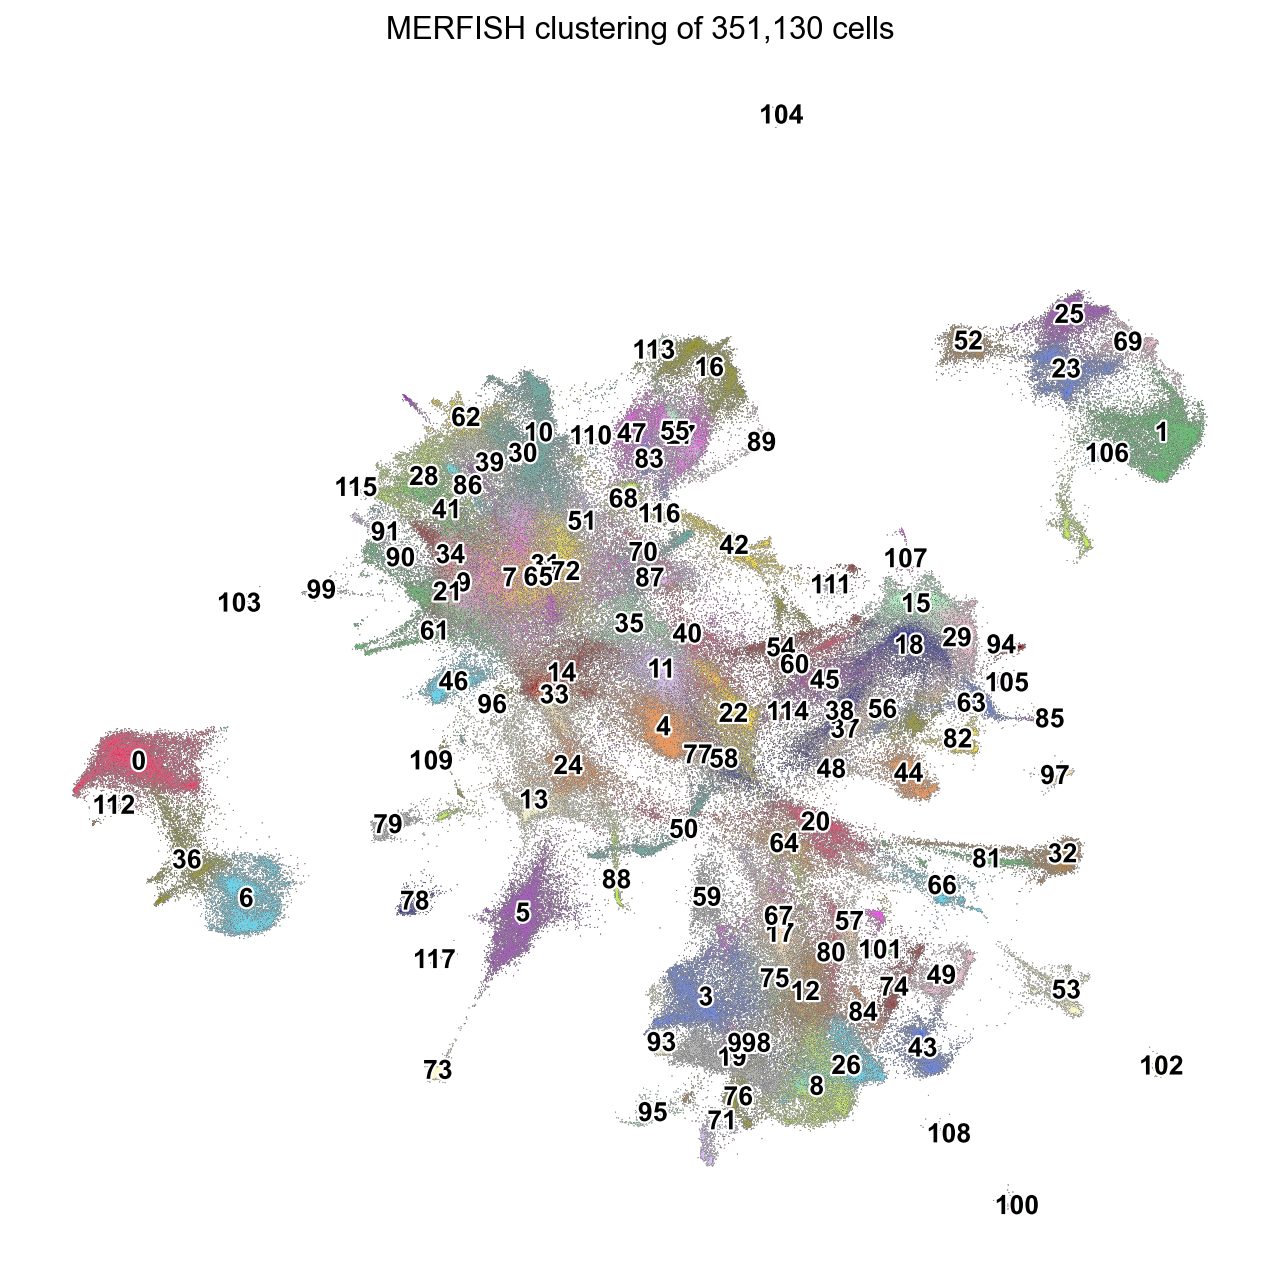

In [37]:
sc.pl.umap(
    adata,
    color="leiden",
    add_outline=True,
    legend_loc="on data",
    legend_fontsize=12,
    legend_fontoutline=2,
    frameon=False,
    title=f"MERFISH clustering of {len(adata):,d} cells",
    palette=cmap
)

C:\Users\BintuLabUser\AppData\Local\Temp\ipykernel_12552\3604534009.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


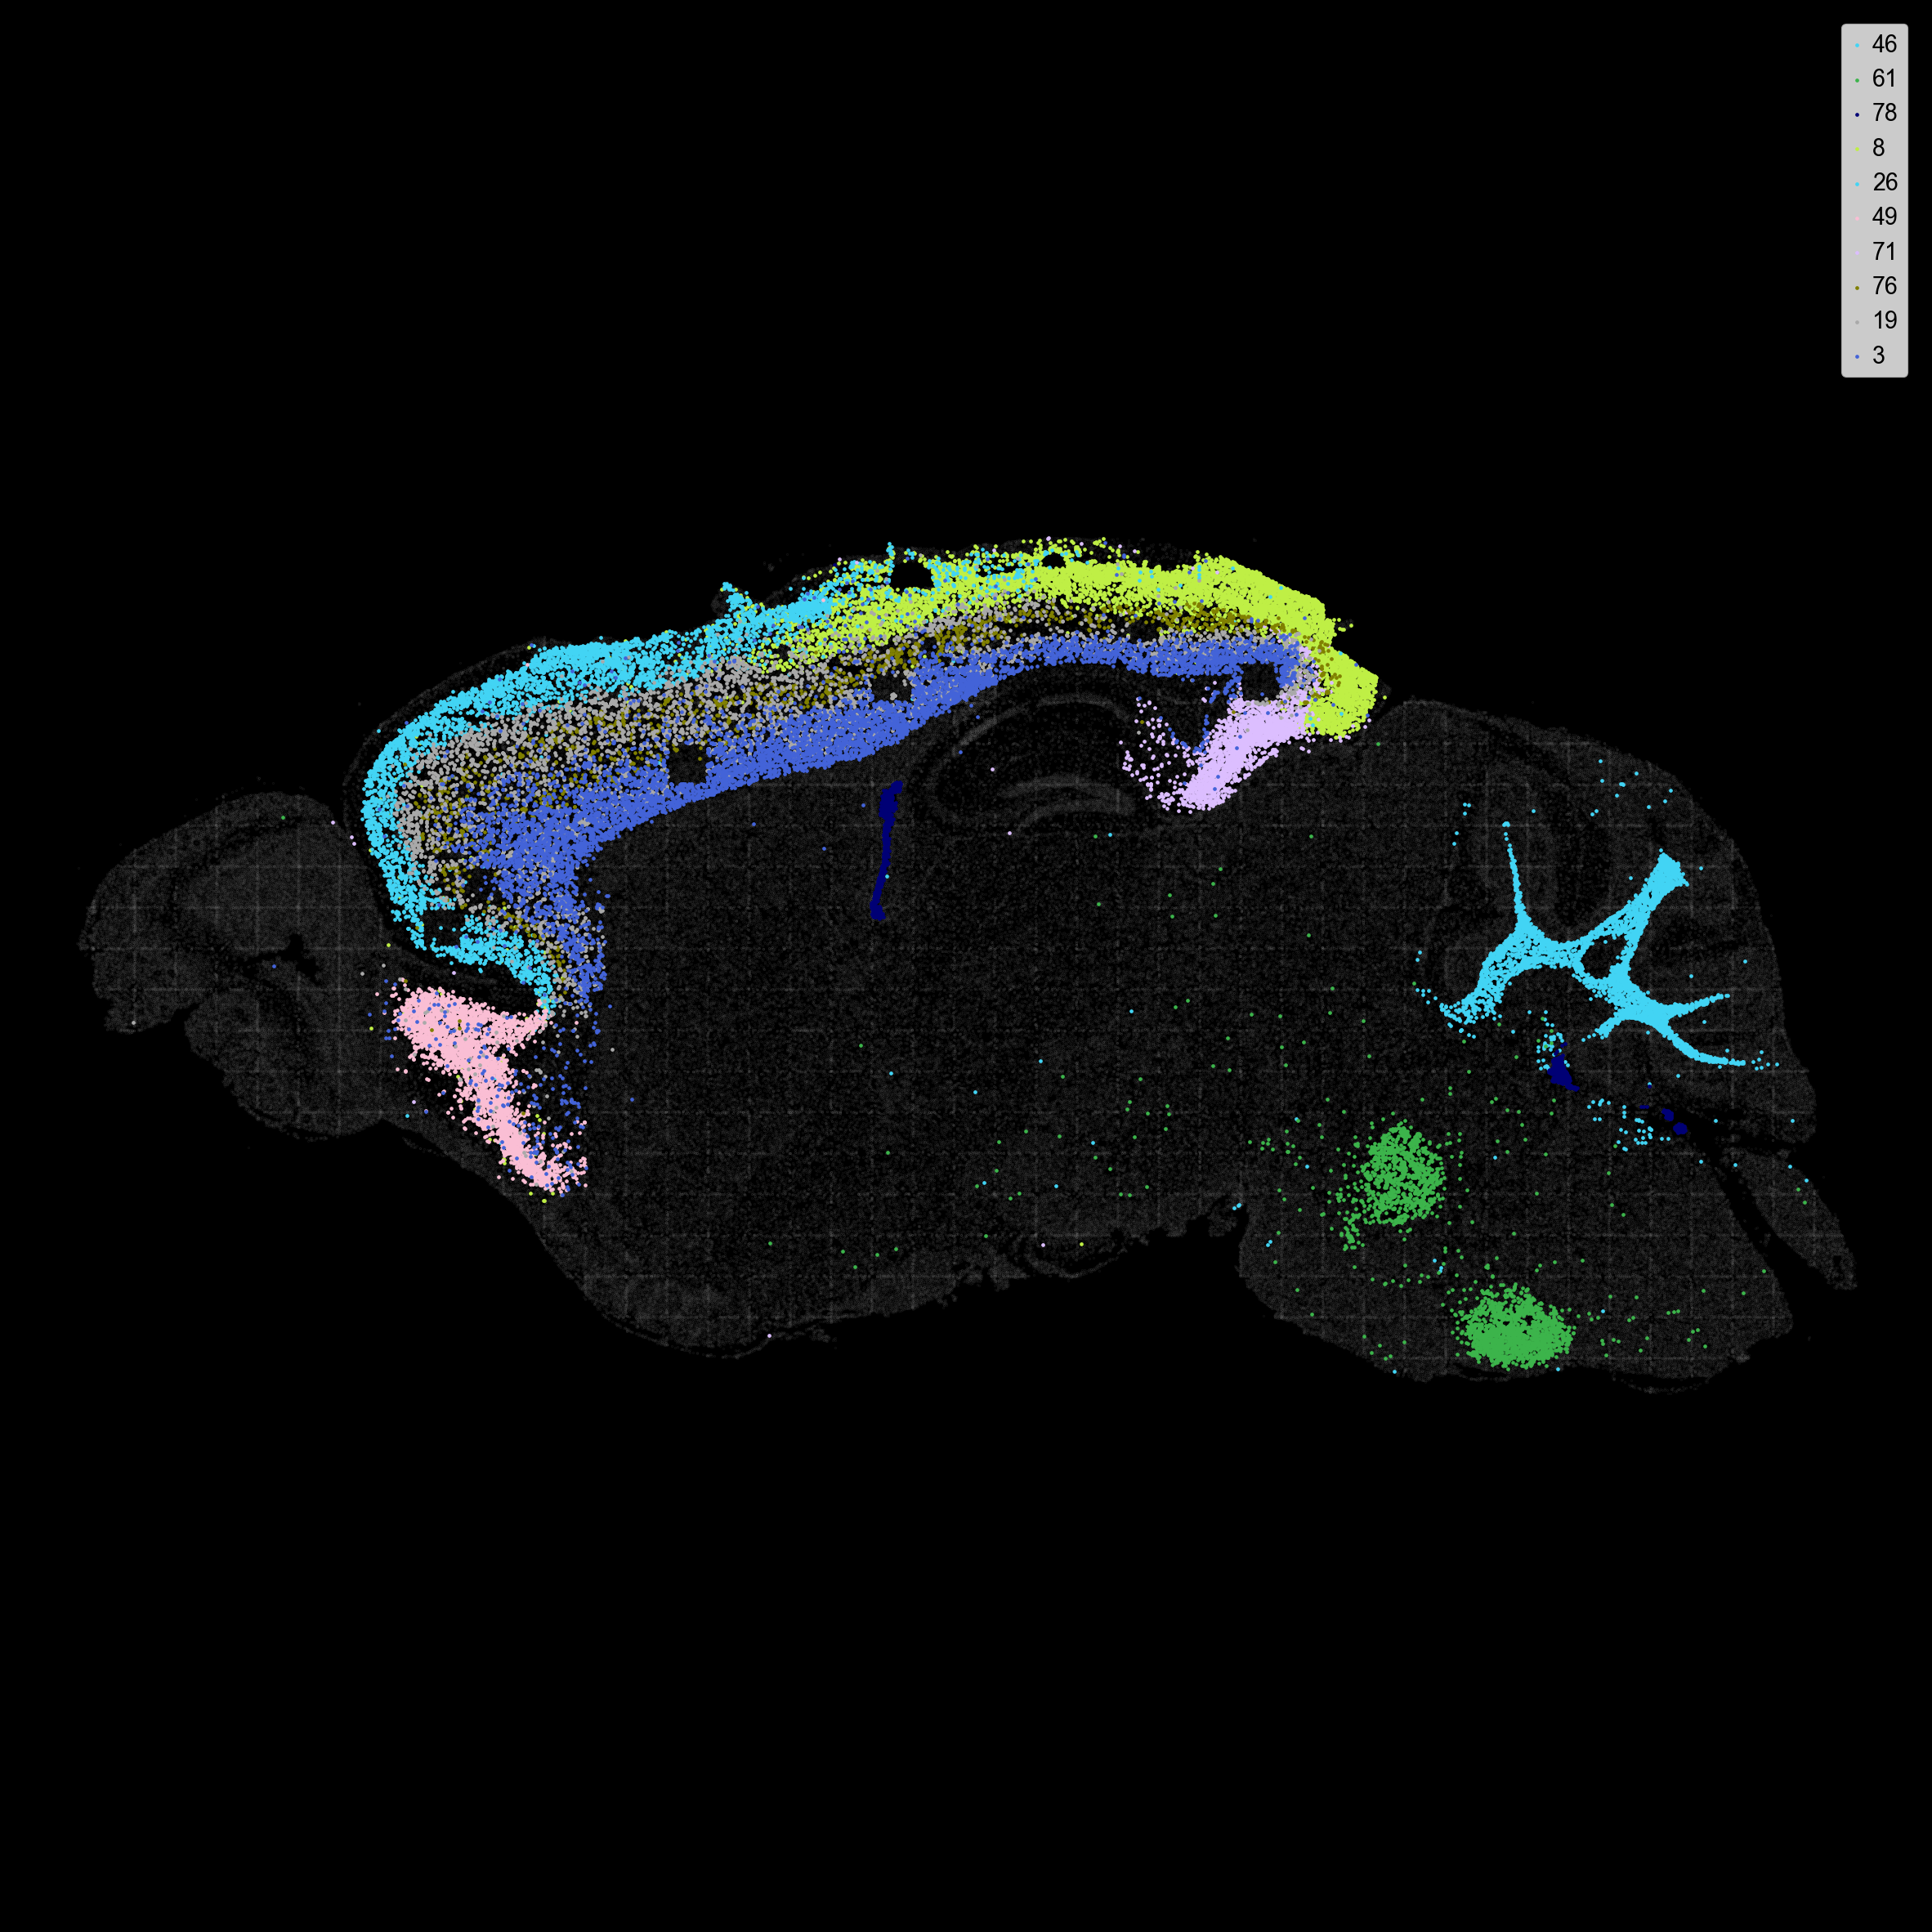

In [71]:
plot_cluster_scdata(adata[adata.obs['tag']=='DCBBL1_4week_6_2_2023_set1'],cmap,clusters=[46,61,78, 8,26,49,71,76,19,3],transpose=-1,flipx=1,flipy=1,ssm=0.01,sbig=5)

C:\Users\BintuLabUser\AppData\Local\Temp\ipykernel_12552\3604534009.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


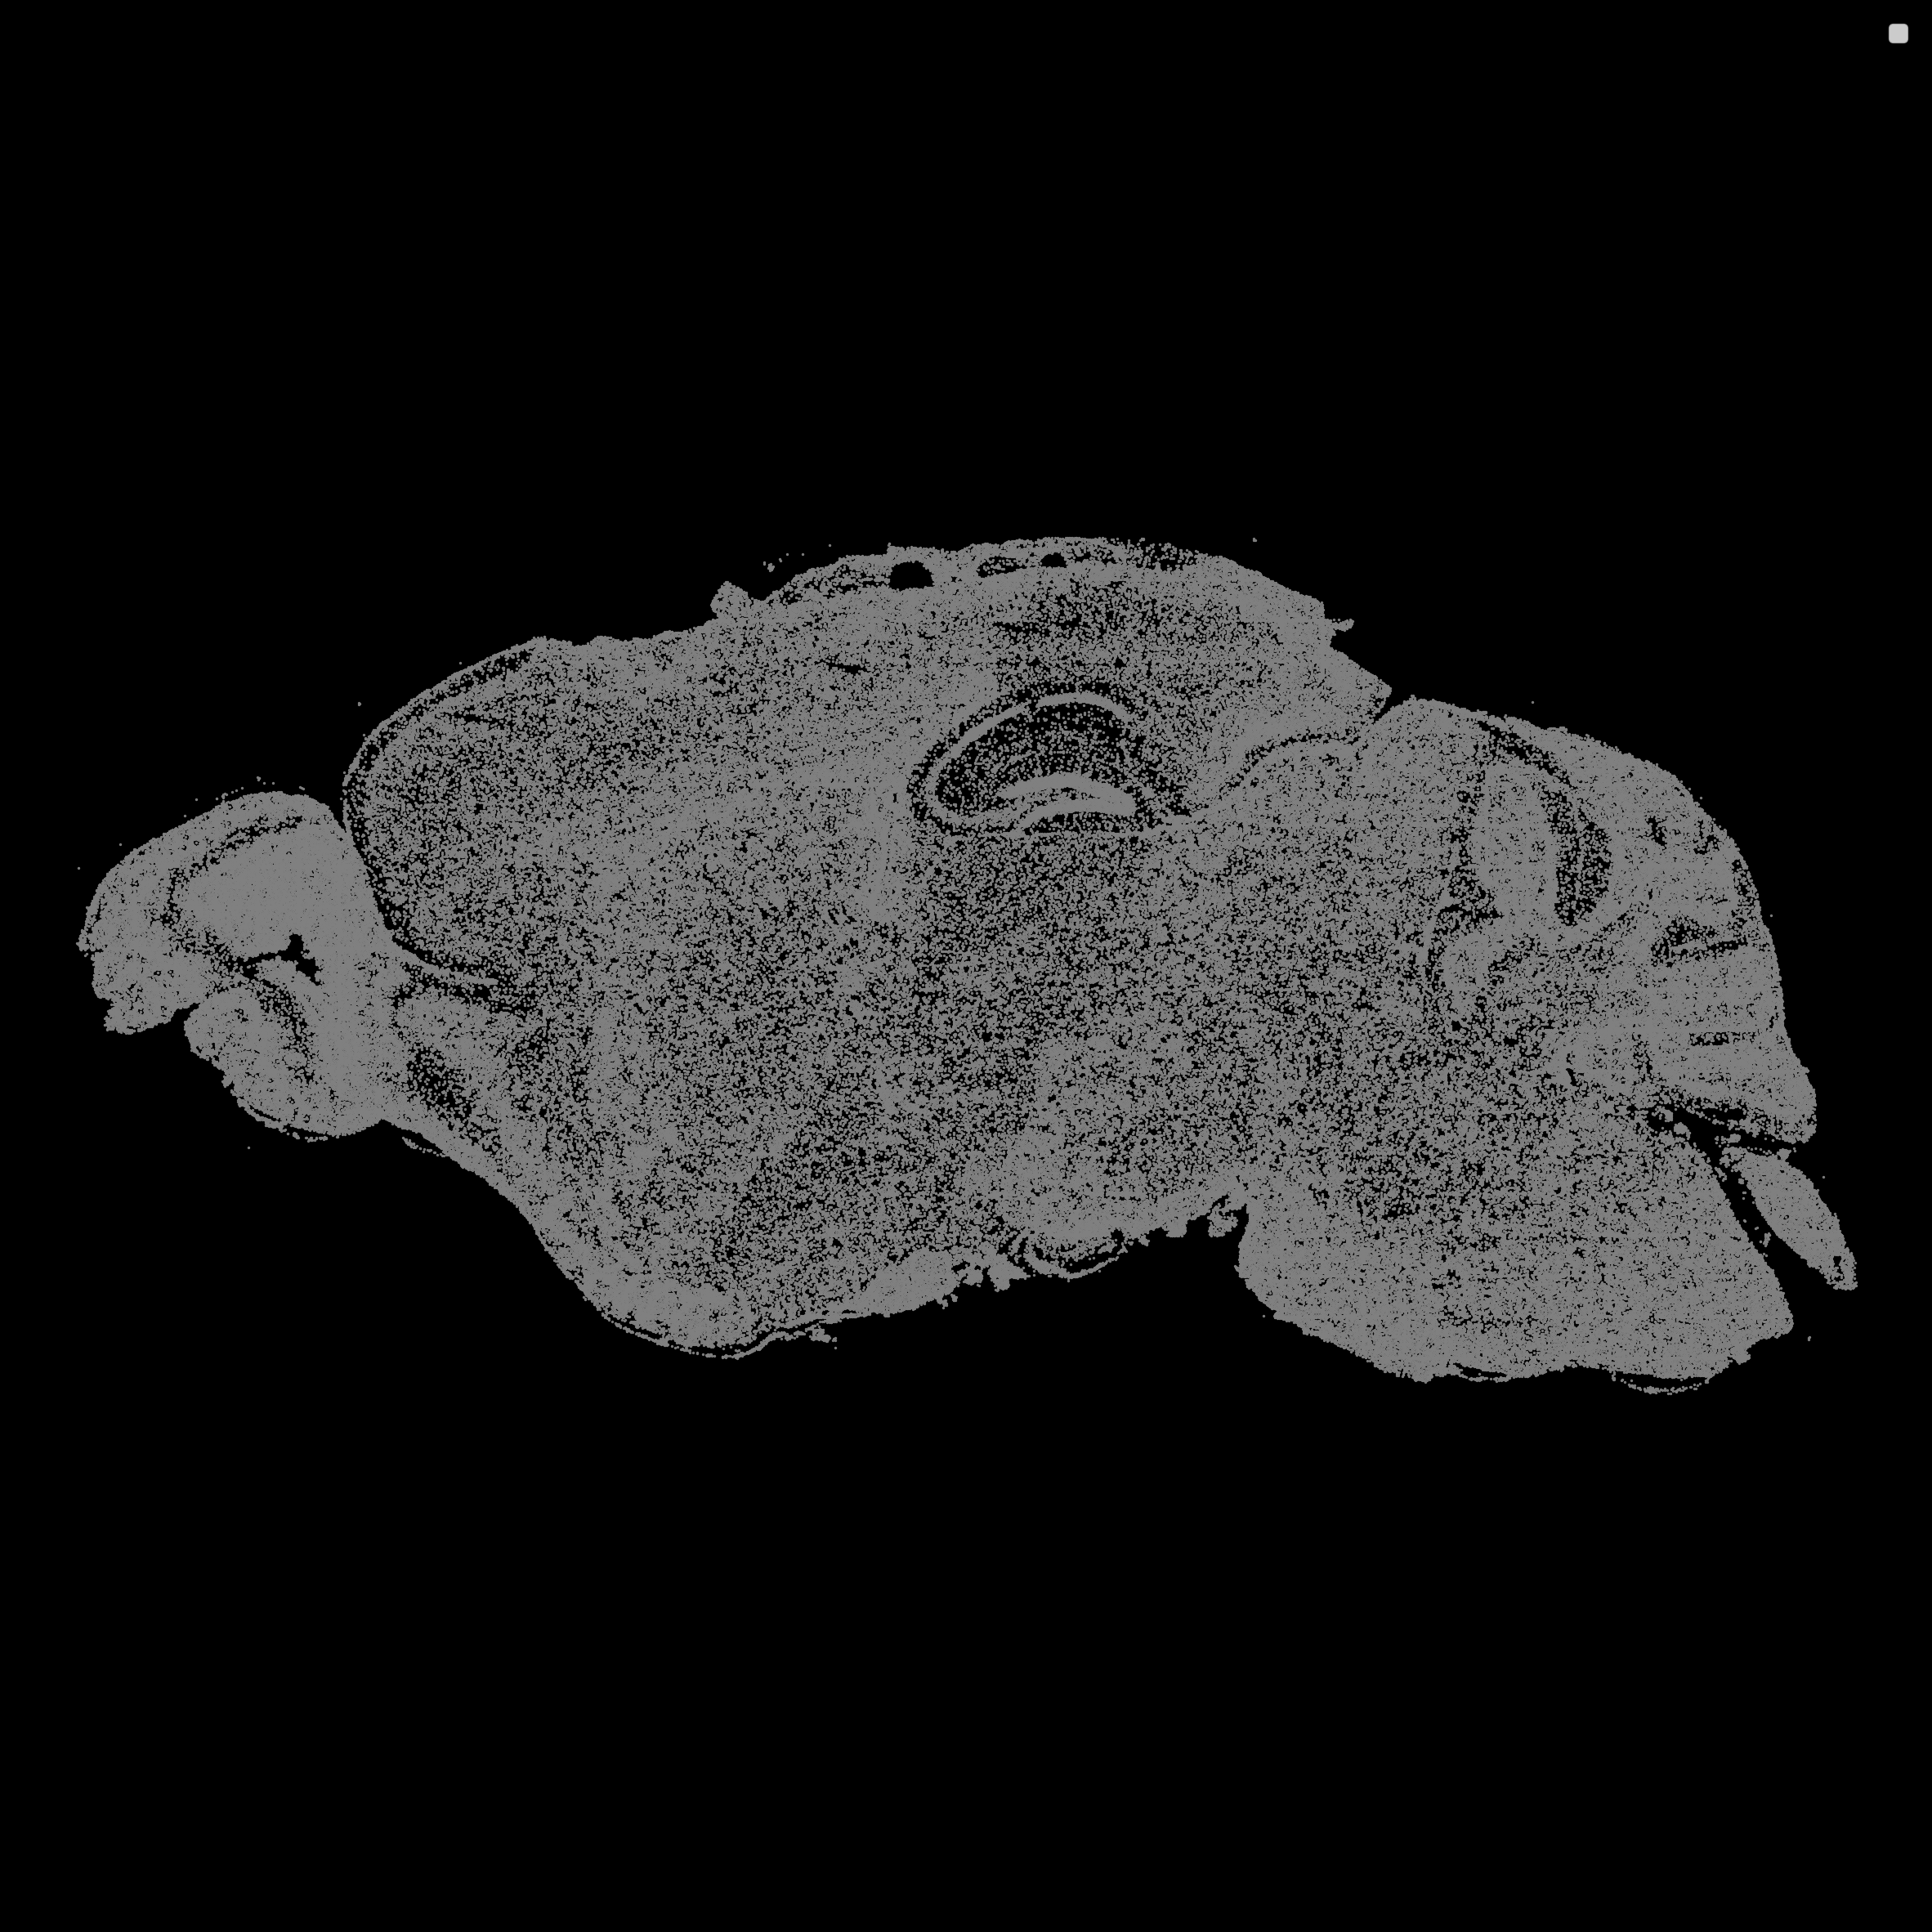

In [56]:
plot_cluster_scdata(adata[adata.obs['tag']=='DCBBL1_4week_6_2_2023_set1'],cmap,clusters=[],transpose=-1,flipx=1,flipy=1,ssm=1,sbig=5)

C:\Users\BintuLabUser\AppData\Local\Temp\ipykernel_12552\3604534009.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


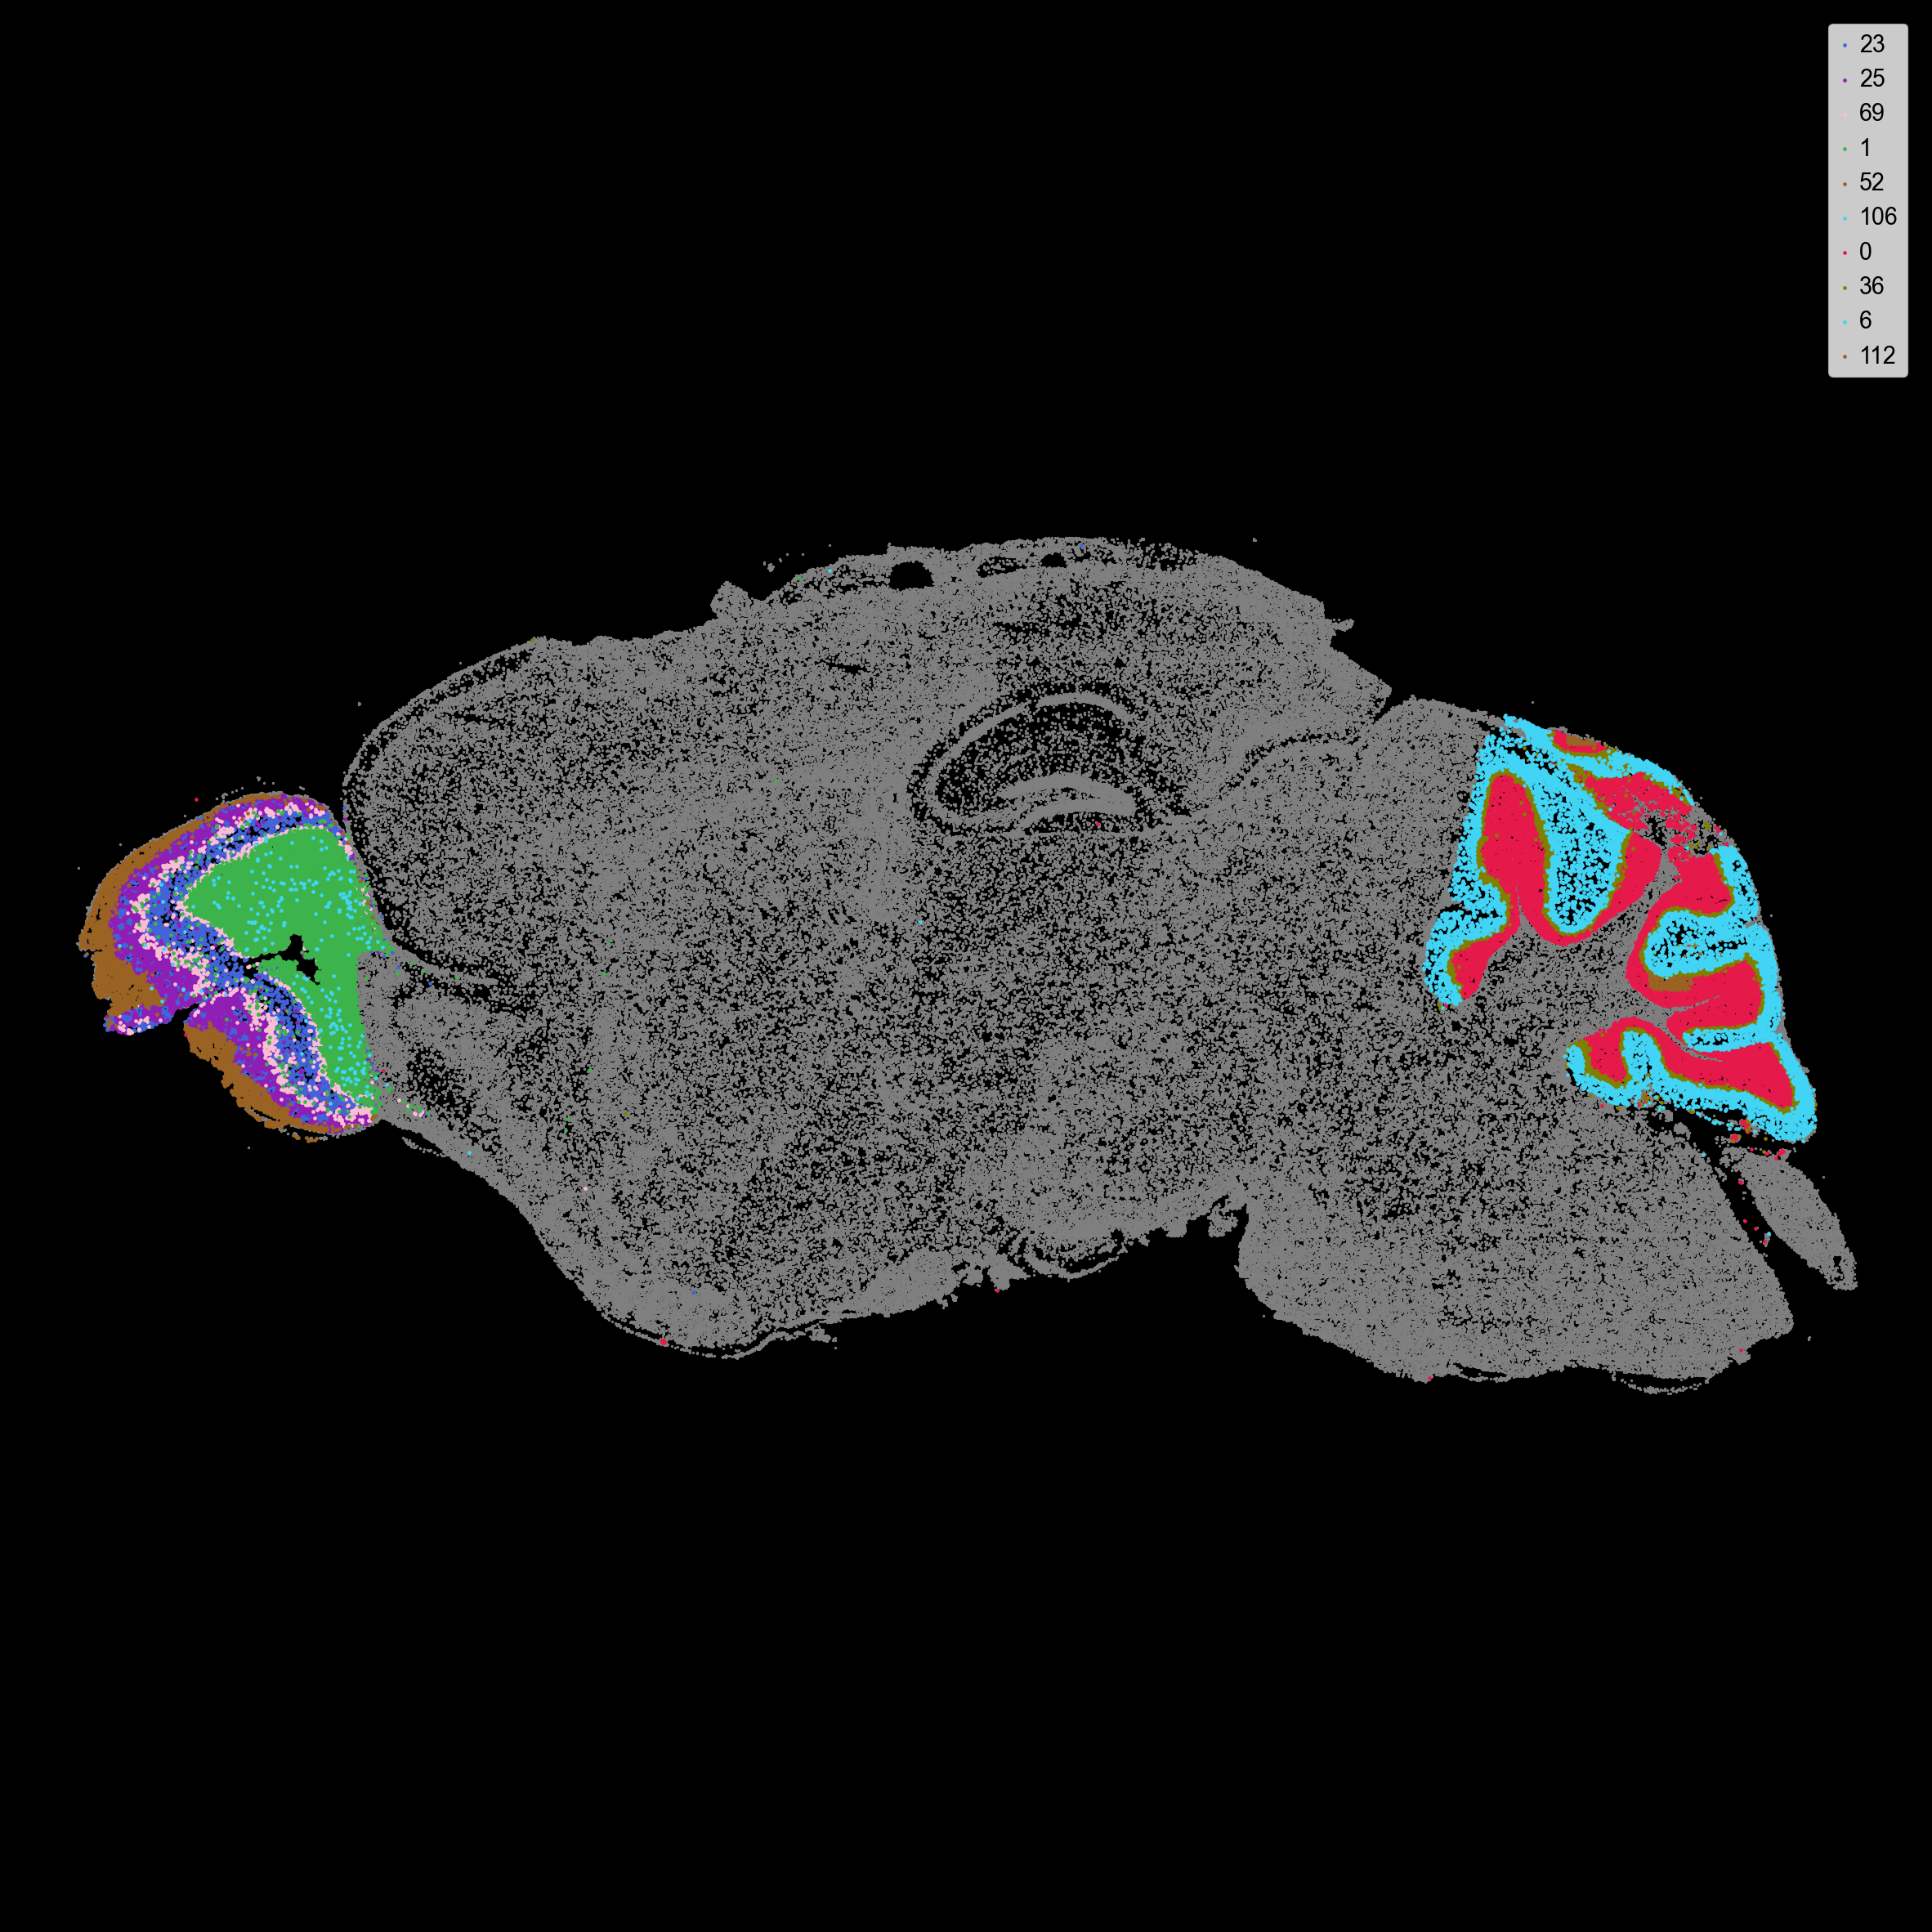

In [55]:
plot_cluster_scdata(adata[adata.obs['tag']=='DCBBL1_4week_6_2_2023_set1'],cmap,clusters=[23,25,69,1,52,106]+[0,36,6,112],transpose=-1,flipx=1,flipy=1,ssm=1,sbig=5)

1           True
2           True
3           True
4           True
5           True
           ...  
4700867    False
4700881    False
4700885    False
4700895    False
4700896    False
Name: tag, Length: 351130, dtype: bool

In [14]:
#np.unique(adata.obs['tag'],return_counts=True)

In [6]:
# Concatenate the two AnnData objects
adata = sc.concat(scdatas, join="outer")

# Give the cells different tags
adata.obs["tag"] = adata.obs["tag"].astype("category")
adata.obs["tag"].cat.set_categories(names)

# Save the concatenated AnnData object
#adata.write_h5ad("concatenated_adata.h5ad")

C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


KeyError: 'tag'

In [7]:
adata

AnnData object with n_obs × n_vars = 351130 × 275
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'X_spatial', 'X_raw', 'X_pca'